In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("✓ Libraries imported successfully!")

✓ Libraries imported successfully!


In [ ]:
from google.colab import files

uploaded = files.upload()
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)

print(f"\n✓ Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")
print(f"\nFirst few rows:")
display(df.head())

Saving candidate_job_role_dataset (1).csv to candidate_job_role_dataset (1).csv

✓ Dataset loaded successfully!
Dataset shape: (1000, 5)

First few rows:


,Student_ID,skills,qualification,experience_level,job_role
0,STU0001,"Python, SQL, TensorFlow, Machine Learning, Com...",Master's in Data Science,Senior,Data Scientist
1,STU0002,"HTML, CSS, JavaScript, React, Teamwork",Bachelor's in Computer Science,Mid,Frontend Developer
2,STU0003,"Java, Spring, SQL, REST APIs, Problem Solving",Bachelor's in Software Engineering,Senior,Backend Developer
3,STU0004,"Figma, Adobe XD, UI/UX Design, Creativity",Bachelor's in Design,Entry,Designer
4,STU0005,"Python, Django, JavaScript, React, Agile",Master's in Computer Science,Mid,Full Stack Python Developer


In [ ]:
print("\n" + "="*70)
print("EXPLORATORY DATA ANALYSIS")
print("="*70)

print("\n1. Dataset Info:")
print(df.info())

print("\n2. Missing Values:")
print(df.isnull().sum())

print("\n3. Target Variable Distribution:")
print(df['job_role'].value_counts())


EXPLORATORY DATA ANALYSIS

1. Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Student_ID        1000 non-null   object
 1   skills            1000 non-null   object
 2   qualification     1000 non-null   object
 3   experience_level  1000 non-null   object
 4   job_role          1000 non-null   object
dtypes: object(5)
memory usage: 39.2+ KB
None

2. Missing Values:
Student_ID          0
skills              0
qualification       0
experience_level    0
job_role            0
dtype: int64

3. Target Variable Distribution:
job_role
Mobile Developer                  75
Designer                          50
Software Project Manager          50
DevOps Engineer                   50
Marketing                         50
C# Developer                      50
HR                                50
Cybersecurity Engineer            50


In [ ]:
print("\n" + "="*70)
print("DATA PREPROCESSING")
print("="*70)

df_processed = df.copy()

# 4.1: Handle Missing Values
print("\n1. Handling Missing Values...")
df_processed.replace('None', np.nan, inplace=True)
for col in ['skills', 'qualification', 'experience_level']:
    df_processed[col].fillna('Unknown', inplace=True)
print("✓ Missing values handled")


DATA PREPROCESSING

1. Handling Missing Values...
✓ Missing values handled


In [ ]:
# 4.2: Encode Categorical Variables
print("\n2. Encoding Categorical Variables...")

label_encoders = {}

for col in ['skills', 'qualification', 'experience_level']:
    le = LabelEncoder()
    df_processed[col + '_encoded'] = le.fit_transform(df_processed[col].astype(str))
    label_encoders[col] = le

# Encode target (job_role)
le_target = LabelEncoder()
df_processed['job_role_encoded'] = le_target.fit_transform(df_processed['job_role'])

print(f"✓ Encoded columns: {list(label_encoders.keys())}")
print(f"✓ Number of job roles: {len(le_target.classes_)}")


2. Encoding Categorical Variables...
✓ Encoded columns: ['skills', 'qualification', 'experience_level']
✓ Number of job roles: 24


In [ ]:
print("\n3. Selecting Features...")
feature_columns = [col + '_encoded' for col in ['skills', 'qualification', 'experience_level']]
X = df_processed[feature_columns]
y = df_processed['job_role_encoded']

# Identify job roles with only one instance
job_role_counts = y.value_counts()
single_instance_job_roles = job_role_counts[job_role_counts == 1].index

# Remove rows with single instance job roles
rows_to_keep = y[~y.isin(single_instance_job_roles)].index
X = X.loc[rows_to_keep]
y = y.loc[rows_to_keep]


print(f"✓ Selected features: {feature_columns}")


3. Selecting Features...
✓ Selected features: ['skills_encoded', 'qualification_encoded', 'experience_level_encoded']


In [ ]:
print("\n4. Splitting Data...")
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(f"✓ Training samples: {len(X_train)}, Testing samples: {len(X_test)}")

# 4.5: Feature Scaling
print("\n5. Scaling Features...")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("✓ Features scaled")



4. Splitting Data...
✓ Training samples: 797, Testing samples: 200

5. Scaling Features...
✓ Features scaled


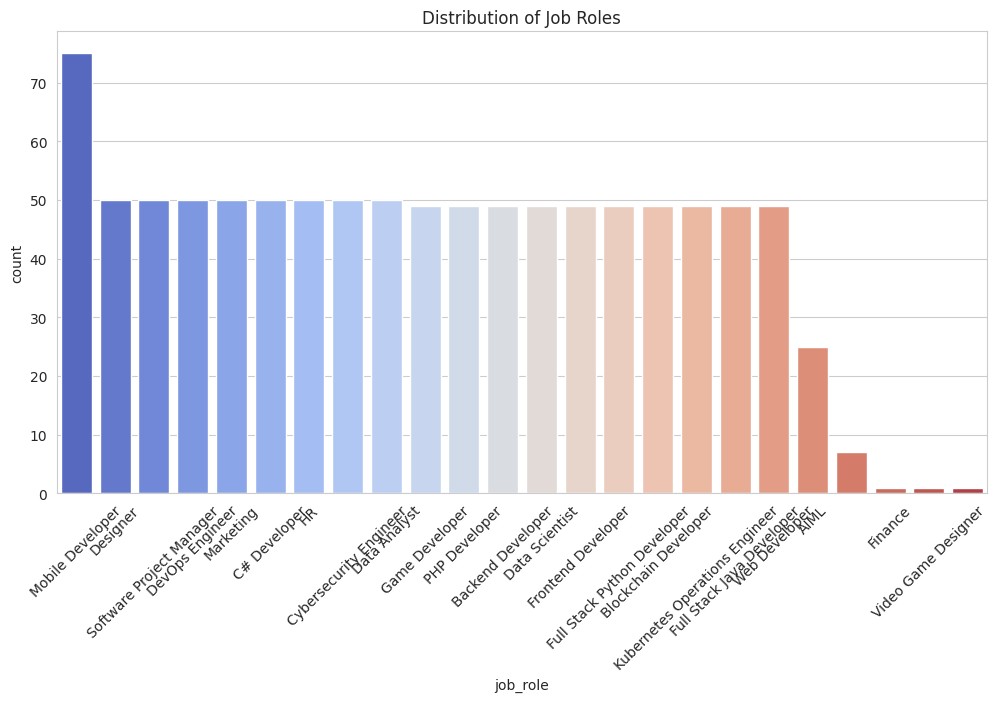


Job Role Percentage Distribution:
 job_role
Mobile Developer                  7.5
Designer                          5.0
Software Project Manager          5.0
DevOps Engineer                   5.0
Marketing                         5.0
C# Developer                      5.0
HR                                5.0
Cybersecurity Engineer            5.0
Data Analyst                      5.0
Game Developer                    4.9
PHP Developer                     4.9
Backend Developer                 4.9
Data Scientist                    4.9
Frontend Developer                4.9
Full Stack Python Developer       4.9
Blockchain Developer              4.9
Kubernetes Operations Engineer    4.9
Full Stack Java Developer         4.9
Web Developer                     4.9
AIML                              2.5
                                  0.7
Finance                           0.1
Video Game Designer               0.1
                                  0.1
Name: proportion, dtype: float64


In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='job_role', order=df['job_role'].value_counts().index, palette='coolwarm')
plt.title("Distribution of Job Roles")
plt.xticks(rotation=45)
plt.show()

# Percentage distribution
job_role_percent = df['job_role'].value_counts(normalize=True) * 100
print("\nJob Role Percentage Distribution:\n", job_role_percent.round(2))


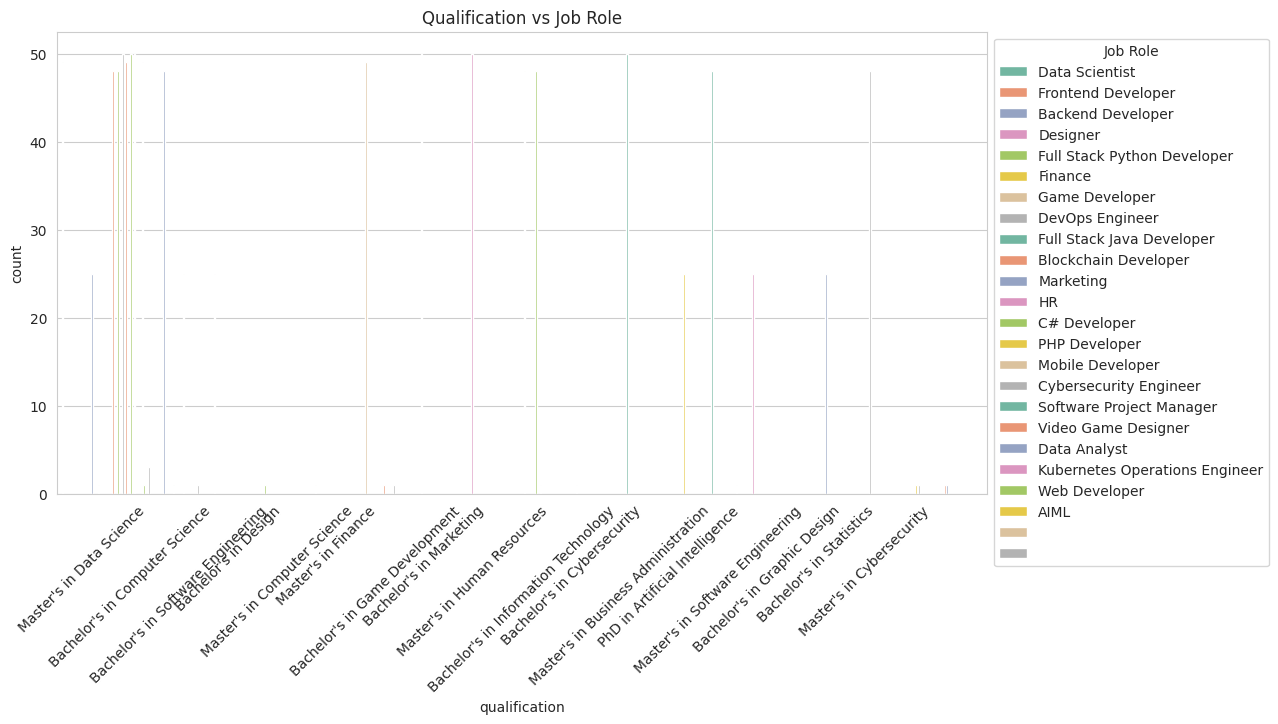

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='qualification', hue='job_role', palette='Set2')
plt.title("Qualification vs Job Role")
plt.xticks(rotation=45)
plt.legend(title='Job Role', bbox_to_anchor=(1,1))
plt.show()

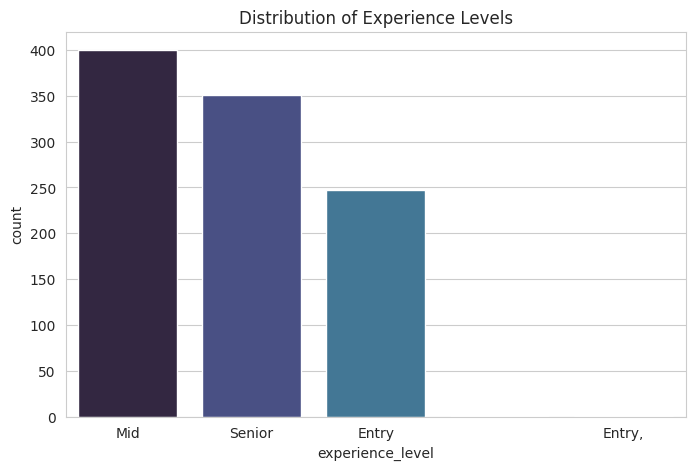

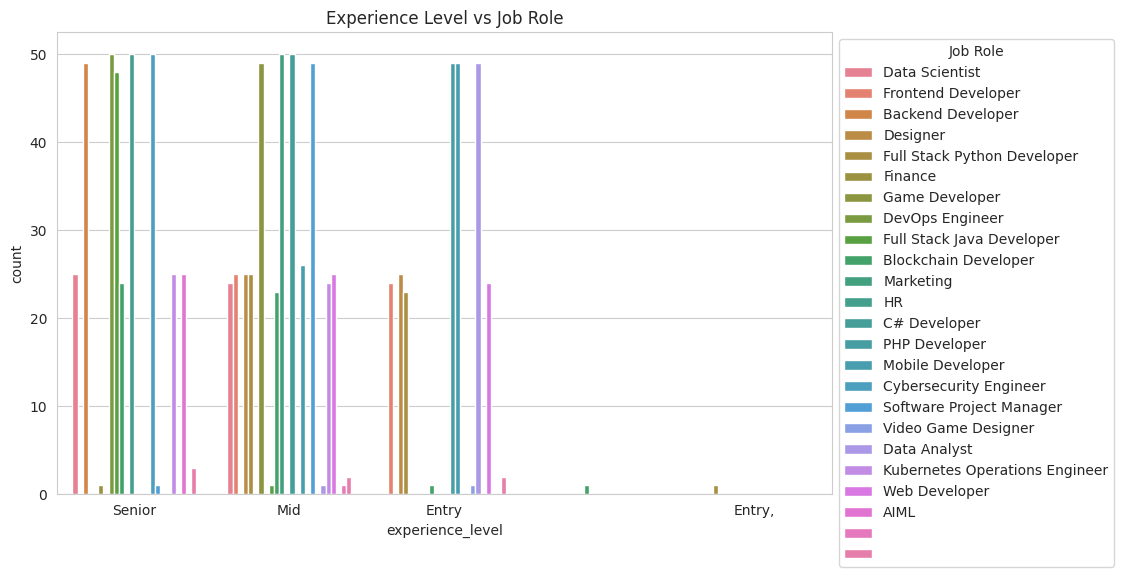

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='experience_level', order=df['experience_level'].value_counts().index, palette='mako')
plt.title("Distribution of Experience Levels")
plt.show()

# Experience vs Job Role
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='experience_level', hue='job_role', palette='husl')
plt.title("Experience Level vs Job Role")
plt.legend(title='Job Role', bbox_to_anchor=(1,1))
plt.show()

/tmp/ipython-input-326946635.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="job_role", data=df, order=df["job_role"].value_counts().index, palette="viridis")


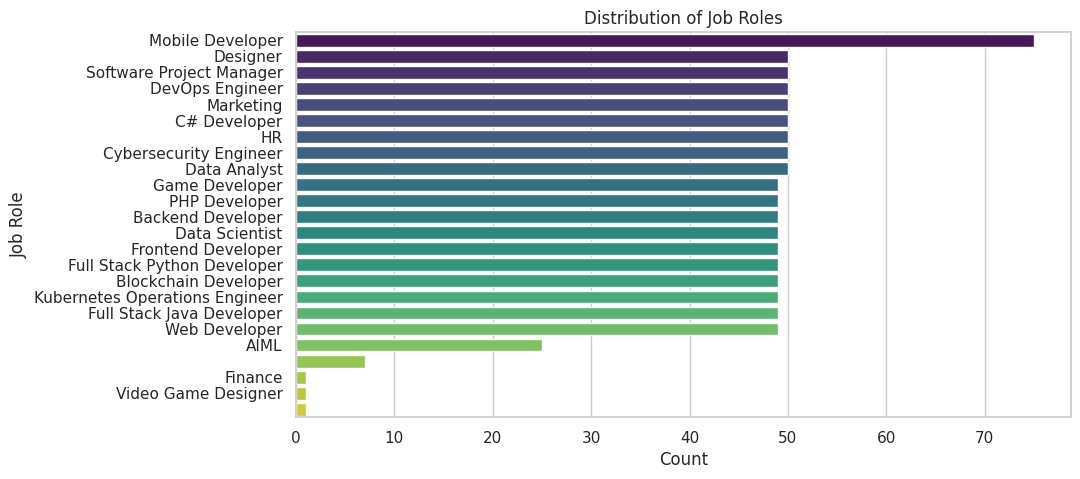

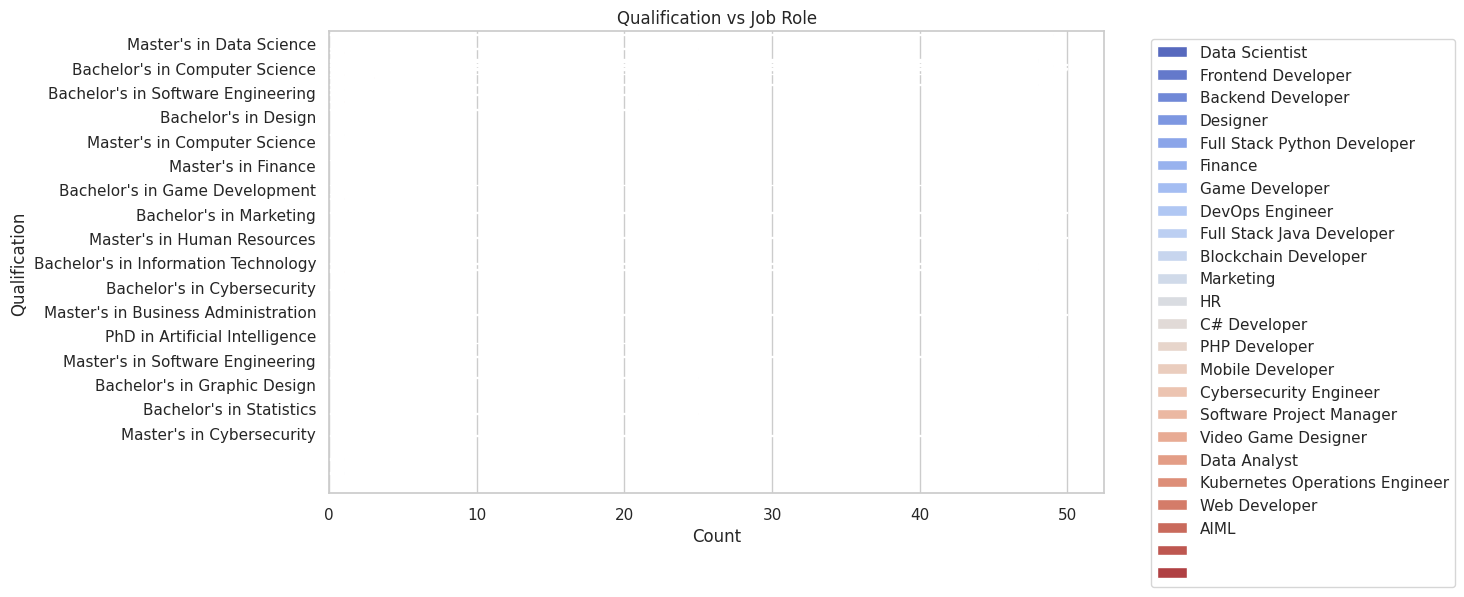

/tmp/ipython-input-326946635.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="experience_level", data=df, palette="mako")


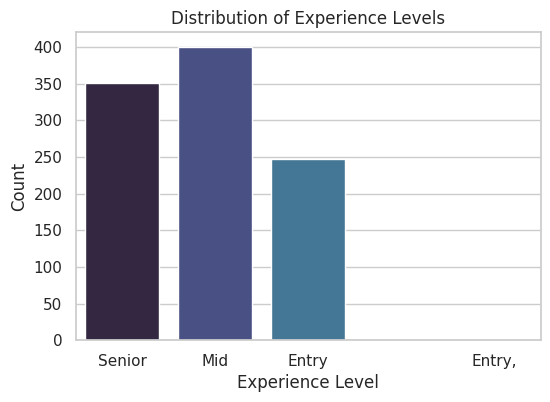

/tmp/ipython-input-326946635.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=skills_df, y="Skill", x="Frequency", palette="cubehelix")


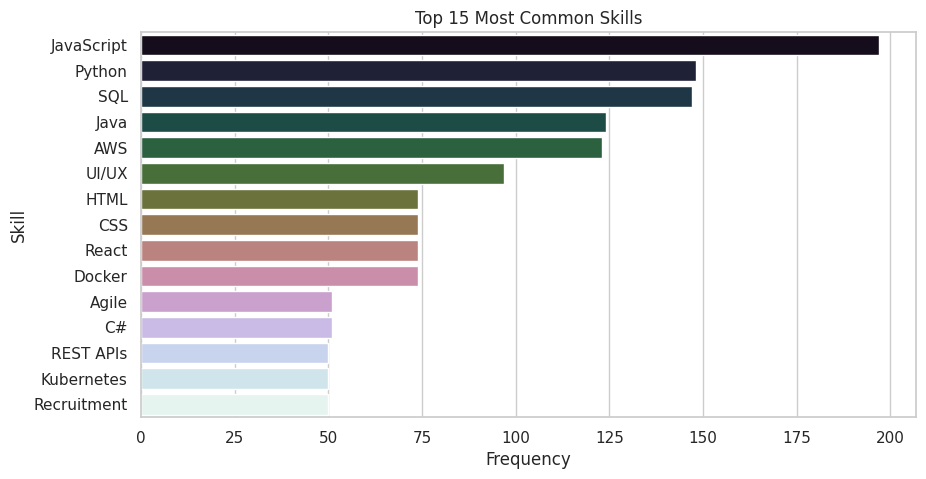

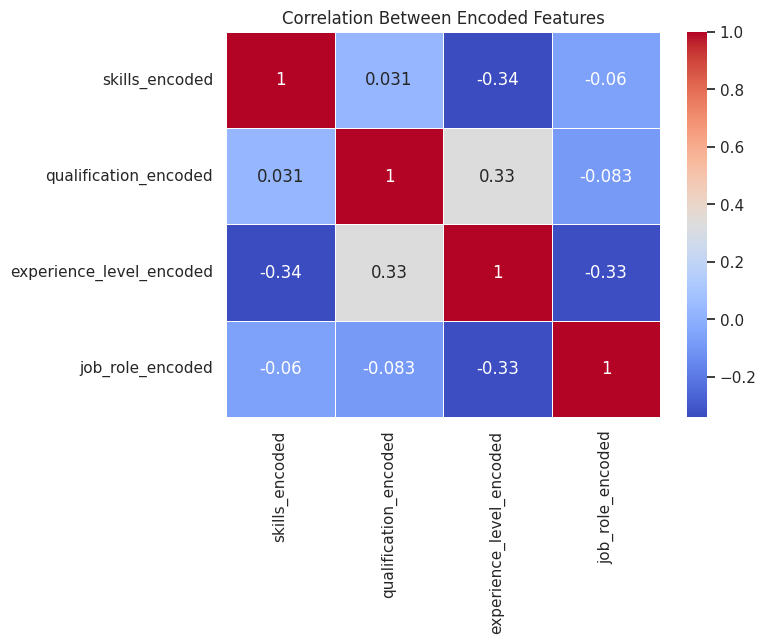

/tmp/ipython-input-326946635.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='experience_level_encoded', y='job_role_encoded', data=df, palette="Set2")


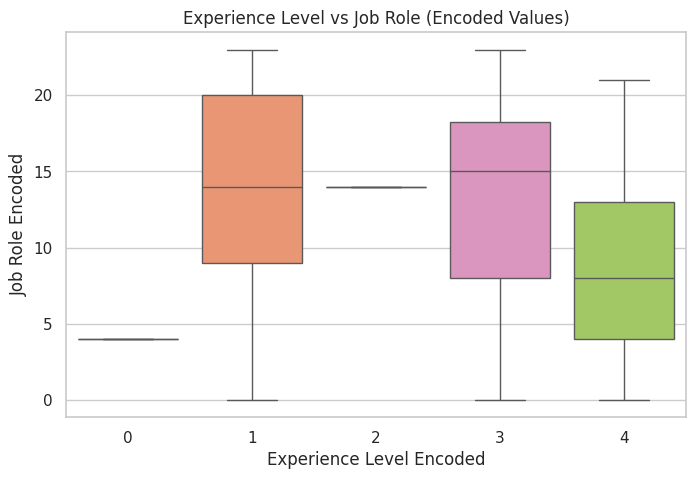

In [13]:
# --------------------------------------------
# 📦 Import Libraries
# --------------------------------------------
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("/content/complete_encoded_dataset (1).csv")  # adjust path if needed

# Set style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)


# --------------------------------------------
# 🎯 2. Distribution of Job Roles
# --------------------------------------------
plt.figure(figsize=(10,5))
sns.countplot(y="job_role", data=df, order=df["job_role"].value_counts().index, palette="viridis")
plt.title("Distribution of Job Roles")
plt.xlabel("Count")
plt.ylabel("Job Role")
plt.show()

# --------------------------------------------
# 🎓 3. Qualification vs Job Role
# --------------------------------------------
plt.figure(figsize=(10,6))
sns.countplot(data=df, y="qualification", hue="job_role", palette="coolwarm")
plt.title("Qualification vs Job Role")
plt.xlabel("Count")
plt.ylabel("Qualification")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# --------------------------------------------
# 👔 4. Experience Level Distribution
# --------------------------------------------
plt.figure(figsize=(6,4))
sns.countplot(x="experience_level", data=df, palette="mako")
plt.title("Distribution of Experience Levels")
plt.xlabel("Experience Level")
plt.ylabel("Count")
plt.show()

# --------------------------------------------
# 🧠 5. Skills Frequency (Top 15)
# --------------------------------------------
from collections import Counter

# Split skills into individual items
skills_list = []
for i in df['skills'].dropna():
    skills_list.extend([s.strip() for s in i.split(',')])

skills_freq = Counter(skills_list).most_common(15)
skills_df = pd.DataFrame(skills_freq, columns=["Skill", "Frequency"])

plt.figure(figsize=(10,5))
sns.barplot(data=skills_df, y="Skill", x="Frequency", palette="cubehelix")
plt.title("Top 15 Most Common Skills")
plt.show()

# --------------------------------------------
# 🔗 6. Correlation Heatmap (Encoded Columns)
# --------------------------------------------
encoded_cols = ['skills_encoded', 'qualification_encoded', 'experience_level_encoded', 'job_role_encoded']

plt.figure(figsize=(7,5))
sns.heatmap(df[encoded_cols].corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Between Encoded Features")
plt.show()

# --------------------------------------------
# 📈 7. Experience vs Job Role (Encoded)
# --------------------------------------------
plt.figure(figsize=(8,5))
sns.boxplot(x='experience_level_encoded', y='job_role_encoded', data=df, palette="Set2")
plt.title("Experience Level vs Job Role (Encoded Values)")
plt.xlabel("Experience Level Encoded")
plt.ylabel("Job Role Encoded")
plt.show()